In [1]:
from autoencoder import autoencoder_model
from gan import DCGAN, discriminator_model, generator_model
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import yfinance as yf
from scipy.spatial import distance
import mplfinance as mpf

/Users/ryousukekaga/repositories/forex-analysis/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
WINDOW = 32
Z_DIM = 100
NUM_FEATURES = 4
dcgan = DCGAN(generator_model(Z_DIM, NUM_FEATURES), discriminator_model(WINDOW, NUM_FEATURES), Z_DIM)
dcgan.built = True
dcgan.load_weights("dcgan_window_32.h5")

N_data = 50000
random_latent_vectors = np.random.normal(
    size=(N_data, 100)
)

generated_data = dcgan.generator(random_latent_vectors)

encoder, decoder, autoencoder = autoencoder_model(WINDOW, Z_DIM, NUM_FEATURES)

if not os.path.exists("autoencoder_gan_window_32.h5"):
    optimizer = Adam(learning_rate=0.001)
    autoencoder.compile(optimizer=optimizer, loss="binary_crossentropy")
    autoencoder.fit(generated_data, generated_data, epochs=50, batch_size=32, shuffle=True)
    autoencoder.save_weights("autoencoder_gan_window_32.h5")

autoencoder.load_weights("autoencoder_gan_window_32.h5")
embeddings = encoder.predict(generated_data)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6409
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5987
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5970
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6006
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6014
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5991
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5967
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5938
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5930
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5935
Epoch 11/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5923
Epoch 12/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5923


In [74]:
ticker = yf.Ticker("EURUSD=X")
real_data = ticker.history(period="1y", interval="1d")[["Open", "High", "Low", "Close"]]

In [75]:
real_data

,Open,High,Low,Close
Date,,,,
2023-05-02 00:00:00+01:00,1.096924,1.100522,1.094355,1.096924
2023-05-03 00:00:00+01:00,1.101091,1.105816,1.100594,1.101091
2023-05-04 00:00:00+01:00,1.106893,1.109139,1.098684,1.106893
2023-05-05 00:00:00+01:00,1.102293,1.104800,1.097165,1.102293
2023-05-08 00:00:00+01:00,1.101868,1.105339,1.101249,1.101868
...,...,...,...,...
2024-04-26 00:00:00+01:00,1.072961,1.075292,1.067555,1.072961
2024-04-29 00:00:00+01:00,1.070687,1.073537,1.069096,1.070687
2024-04-30 00:00:00+01:00,1.071570,1.073653,1.068433,1.071570


In [76]:
windows = np.array(list(real_data.rolling(window=WINDOW))[WINDOW:])

In [77]:
windows[-1]

array([[1.08633065, 1.08742929, 1.08369362, 1.08633065],
       [1.09372103, 1.09445119, 1.08564675, 1.09372103],
       [1.08623624, 1.0869565 , 1.0809058 , 1.08623624],
       [1.08075392, 1.08436346, 1.08026361, 1.08075392],
       [1.08382285, 1.08641338, 1.08260262, 1.08382285],
       [1.08323586, 1.08392859, 1.08117461, 1.08323586],
       [1.08133829, 1.08283699, 1.07755136, 1.08133829],
       [1.07944727, 1.08073056, 1.07688987, 1.07944727],
       [1.07927263, 1.08014691, 1.07315719, 1.07927263],
       [1.07372177, 1.07787657, 1.07253551, 1.07372177],
       [1.07685518, 1.08318889, 1.07647264, 1.07685518],
       [1.08383465, 1.08758307, 1.08350575, 1.08383465],
       [1.08370543, 1.08484578, 1.07916772, 1.08370543],
       [1.08304811, 1.08583534, 1.08215737, 1.08304811],
       [1.08636618, 1.08885014, 1.08498704, 1.08636618],
       [1.08592963, 1.08683836, 1.07337594, 1.08592963],
       [1.07417154, 1.07558107, 1.07004523, 1.07417154],
       [1.07268512, 1.07296145,

In [78]:
real_embeddings = encoder.predict(windows)

8/8 [==============================] - 0s 2ms/step


In [79]:
real_embeddings[-1]

array([ 28.078993  ,  15.668356  , -16.7435    , -78.1057    ,
       -21.489237  ,  -1.5212631 , -10.512693  ,   0.7777475 ,
       -15.281283  , -30.590775  ,  25.635431  ,  20.96457   ,
        -6.00493   , -37.828785  ,   4.082584  ,  -0.40117428,
       -38.471752  ,  25.600191  ,  28.188904  , -16.767748  ,
        31.30035   , -92.83189   ,  37.917706  , -13.483979  ,
        -3.1946054 ,   3.7184598 , -62.41963   ,  23.203907  ,
        33.88456   ,  -1.2242663 ,  26.816542  , -20.710978  ,
       -36.574005  , -19.441746  ,   6.9407406 , -20.61611   ,
       -16.733131  ,  15.571613  ,  17.36689   , -17.340118  ,
       -37.626038  ,  -8.660713  ,  -6.9058642 , -23.138136  ,
        70.86424   ,  57.10341   , -20.080511  , -21.866476  ,
       -22.644608  , -34.897934  ,   9.97752   ,  50.19837   ,
       -24.149422  , -38.6049    , -44.40703   , -45.792225  ,
        -0.6878941 ,  -4.0009613 , -23.824453  , -35.516537  ,
        28.96287   ,  10.423043  ,  11.2252865 ,   0.41

In [80]:
embeddings

array([[ -0.85199916, -10.792267  ,  -1.1808178 , ...,   0.455146  ,
        -23.422062  ,   7.600423  ],
       [  6.8539953 ,  -3.0758393 ,   5.8510323 , ...,   4.5836563 ,
        -13.365161  ,   4.326695  ],
       [ -0.5230396 , -10.165046  ,   4.6621666 , ...,   2.4176137 ,
        -22.204742  ,   5.347628  ],
       ...,
       [ 19.13944   ,  21.418587  ,  -5.8592176 , ...,   7.8268385 ,
         13.139338  , -18.67774   ],
       [ 21.605982  ,  16.68843   ,   3.3040588 , ...,   2.6614082 ,
          6.2822227 ,  -5.579637  ],
       [ 23.440968  ,  18.574392  ,  -2.099288  , ...,   0.15554702,
         15.498519  , -16.503597  ]], dtype=float32)

In [81]:
distances = np.array([distance.euclidean(embedding, real_embeddings[-1]) for embedding in embeddings])

In [82]:
distances.argmin()

8080

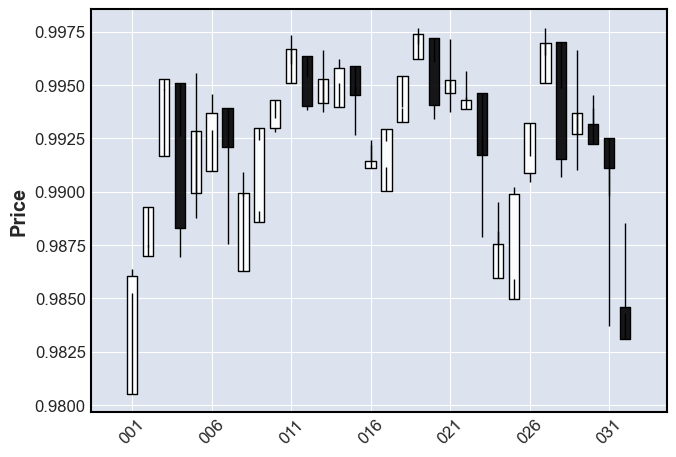

In [83]:
similar = pd.DataFrame(generated_data[distances.argmin()], columns=["Open", "High", "Low", "Close"])
similar.index = pd.date_range('1/1/2021',periods=(similar.shape[0]))
mpf.plot(similar, type='candle', datetime_format='%j')

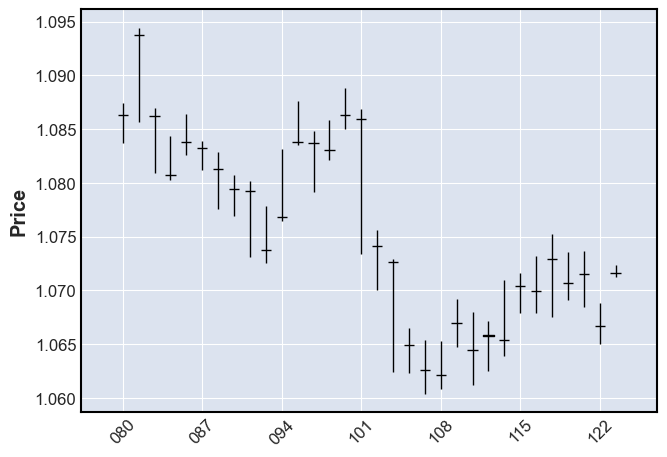

In [84]:
mpf.plot(real_data[-WINDOW:], type='candle', datetime_format='%j')